
## Outlines

- Data Wrangling and cleaning
- Data preprocessing
- Modeling

## Notes
- <span style="color:red">**PROVE ALL YOUR ANSWERS WITH GRAPHS IF AVAILABLE**.
- All Mentioned Models **MUST** be used.
- Read the problems well, before you start solving.
- The solution **MUST** pass all the test cases.
- Feel free to add more cells to develope the program, **BUT** make sure you gather them in ONE adequately working code cell.  

#### **Good Luck**

## <span style="color:blue">Problem statment

The provided dataset addresses an income classification problem, aiming to determine whether annual income is anticipated to be below or above $50,000 based on given features. While a feature description is provided, further independent research is encouraged for a comprehensive understanding of the problem.


## <span style="color:blue">Requirments
    
   
- **1)** Explaratory Data Analysis.
     - Assess Data Cleanliness.
     - Handle Missing Values.
     - Address missing values in the dataset.
     - Explore Salary Influencing Variables.
     - Identify variables that may impact salary status.
     - Utilize Statistical Techniques.
     - Apply statistical methods.
     - Consider Variable Reduction.


- **2)** Model Building:
    - Conduct preprocessing and feature selection.
    - Build four classification models: K-Nearest Neighbor, Support Vector Machine, Decision Tree, and Random Forest.
    - Implement necessary preprocessing steps for each model..
   
    
- **3)** Model Evaluation:
     - Compare the results of the four models using a **Classification Report**.
     - Provide insightful comments on the performance of each model.          
    
- **4)** Answer the following Question:
    -   **A)** Do you think based on the data that there is a discriminate based on any certain feature??
    -   **B)**  Are there any unexpected biases or disparities in the data that might indicate potential discrimination issues??
    -   **C)**  Were there any notable challenges or advantages with any specific model during the building and evaluation process??
    -   **D)**  How robust are the models to changes in the dataset or additional features? Do they generalize well to new, unseen data??


### Column Descriptions:

- **Income:** Two classes (<=50K, >50K)
- **Age:** Continuous.
- **Workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **Fnlwgt:** Continuous.
- **Education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **Education-num:** Continuous.
- **Marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- **Occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-- inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **Relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **Race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **Sex:** Female, Male.
- **Capital-gain:** Continuous.
- **Capital-loss:** Continuous.
- **Hours-per-week:** Continuous.
- **Native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



### Write you code here ###

**1)** Explaratory Data Analysis.

## Import The Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import The Data

In [2]:
income = pd.read_csv('income_evaluation.csv')
income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
income.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

## EDA

In [4]:
income.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
income.info() #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Univariate Analysis

### Age Feature

In [6]:
income['age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64

#### Distribution

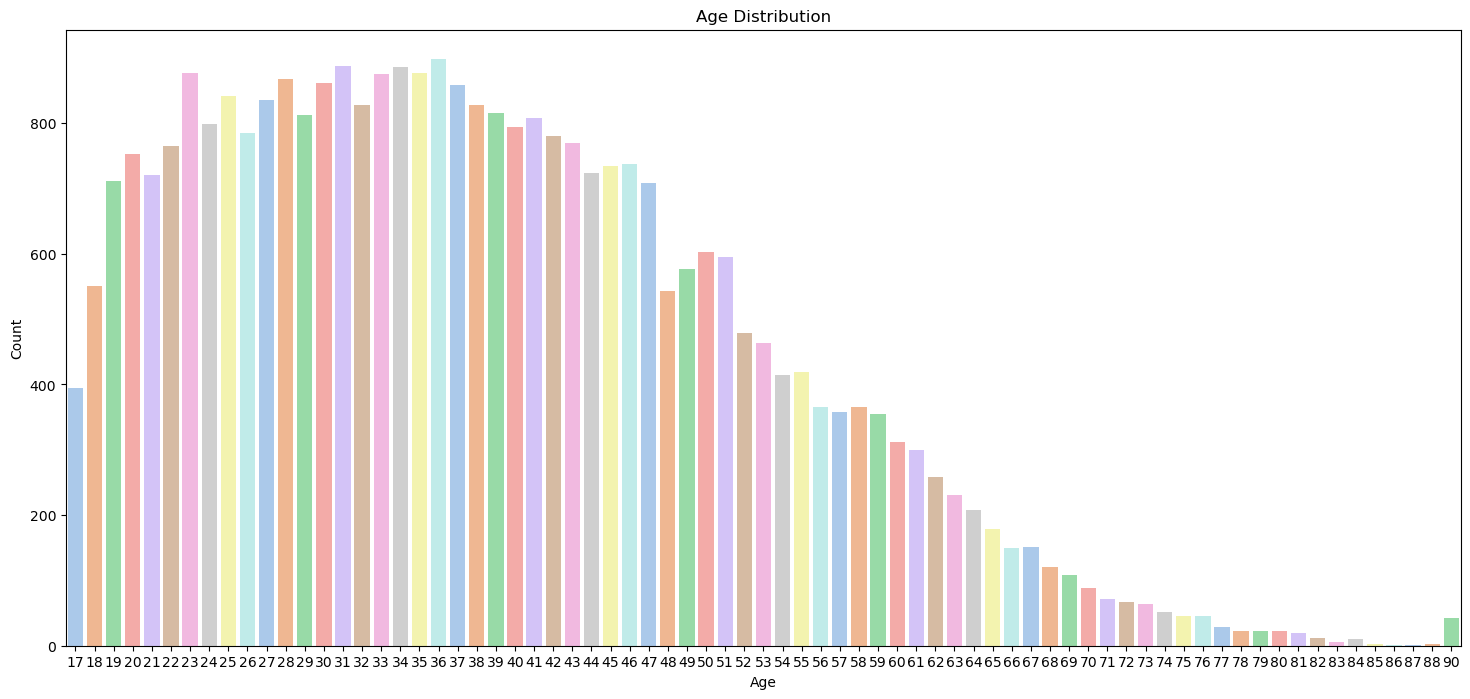

In [7]:
# Create a count plot using Seaborn
plt.figure(figsize=(18, 8))
sns.countplot(x='age', data=income, palette='pastel')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [8]:
income['age'].describe() #to show age description

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

**Age has right-skewed distribution**

**Approximately 68% of the ages fall within range of 24.94 to 52.22**

**Approximately 95% of the ages fall within range of 11.30 to 65.86**

#### Outliers

Text(0.5, 1.0, 'Box Plot')

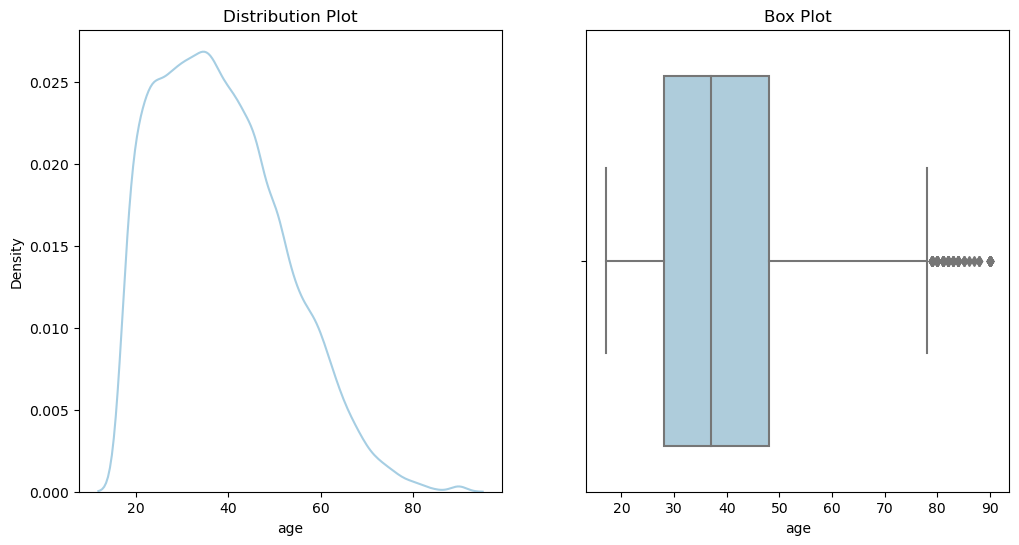

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot distribution 
sns.kdeplot(x='age', data=income, ax=axes[0] , color = "#a6cee3" )
axes[0].set_title('Distribution Plot')

# Plot box plot
sns.boxplot(x='age', data=income, ax=axes[1] , color ="#a6cee3" )
axes[1].set_title('Box Plot')

In [10]:
# Calculate quartiles and IQR
q1 = np.percentile(income['age'], 25)
q3 = np.percentile(income['age'], 75)
iqr = q3 - q1
k = 1.5

# Calculate boundaries
lower_bound = q1 - k * iqr
upper_bound = q3 + k * iqr

print(f"upper_bound: {upper_bound}")

upper_bound: 78.0


**All ages that greater than 78 are outliers by variance**

### Final Weight Feature

In [11]:
income[' fnlwgt'].describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name:  fnlwgt, dtype: float64

In [12]:
income[' fnlwgt'].value_counts()

164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name:  fnlwgt, Length: 21648, dtype: int64

#### Outlires

Text(0.5, 1.0, 'Box Plot')

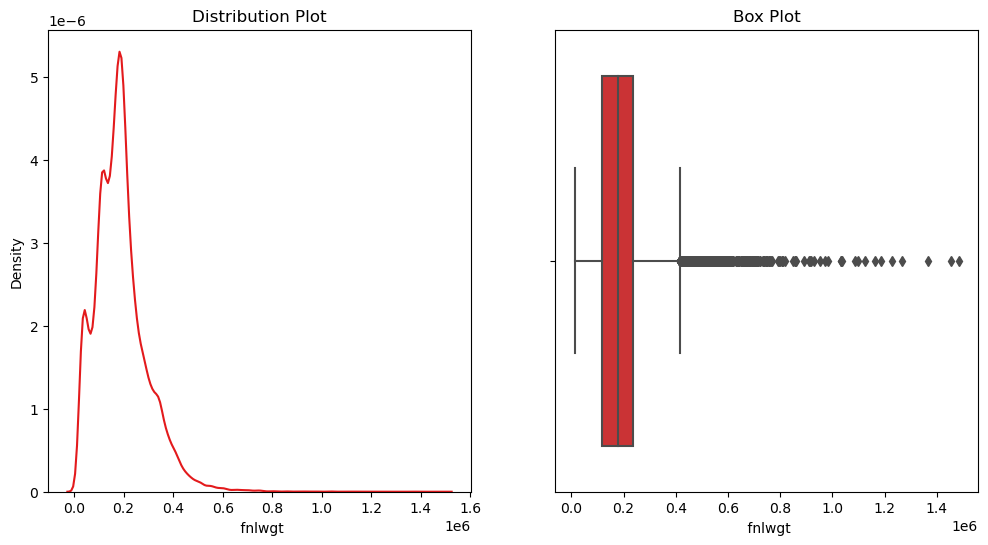

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot distribution 
sns.kdeplot(x=' fnlwgt', data=income, ax=axes[0] , color = "#e31a1c" )
axes[0].set_title('Distribution Plot')

# Plot box plot
sns.boxplot(x=' fnlwgt', data=income, ax=axes[1] , color = "#e31a1c" )
axes[1].set_title('Box Plot')

In [14]:
# Calculate quartiles and IQR
q1 = np.percentile(income[' fnlwgt'], 25)
q3 = np.percentile(income[' fnlwgt'], 75)
iqr = q3 - q1
k = 1.5

# Calculate boundaries
lower_bound = q1 - k * iqr
upper_bound = q3 + k * iqr

print(f"upper_bound: {upper_bound}")

upper_bound: 415887.0


**Final Weights feature has right-skewed distribution**

**All Final Weights that greater than 415887 are outliers by variance**

### Race Feature

In [15]:
income[' race'].describe()

count      32561
unique         5
top        White
freq       27816
Name:  race, dtype: object

In [16]:
income[' race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name:  race, dtype: int64

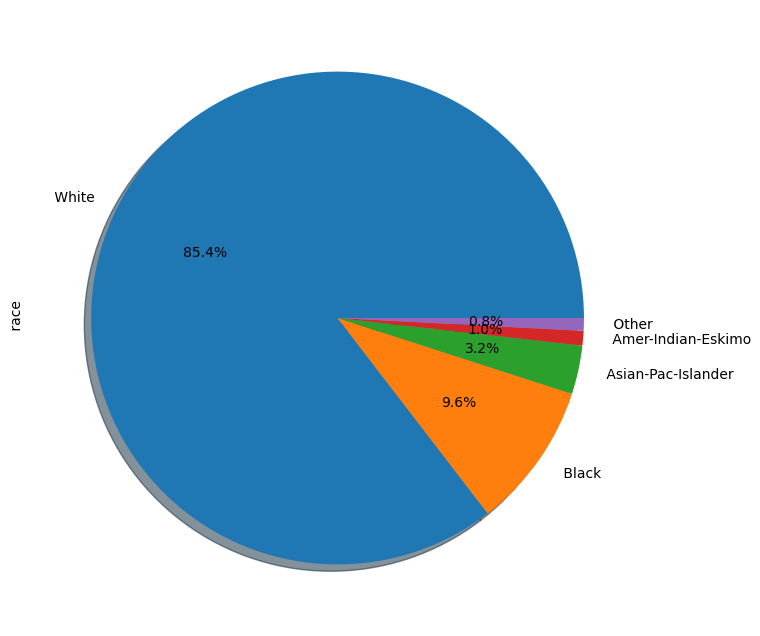

In [17]:
plt.figure(figsize=(10, 8))
income[' race'].value_counts().plot.pie(autopct='%1.1f%%',shadow = True)
plt.show()

**The most people are white with 85% & 10% of them are black**

**This feature has very low variance**

#### Information Gain

In [18]:
# Calculate entropy
value_counts = income[' race'].value_counts(normalize=True)
entropy = -np.sum(value_counts * np.log2(value_counts))

print(f"Entropy Of Race Feature : {entropy:.2f}")

Entropy Of Race Feature : 0.80


**Entropy Of Race Feature : 0.80**

**The entropy is high so the gain inforamtion from this feature is low**

In [19]:
#drop the race column
income = income.drop(' race' , axis = 1) #because it has very low variance , so it won't impact on the target

### Sex Feature

In [20]:
income[' sex'].value_counts()

 Male      21790
 Female    10771
Name:  sex, dtype: int64

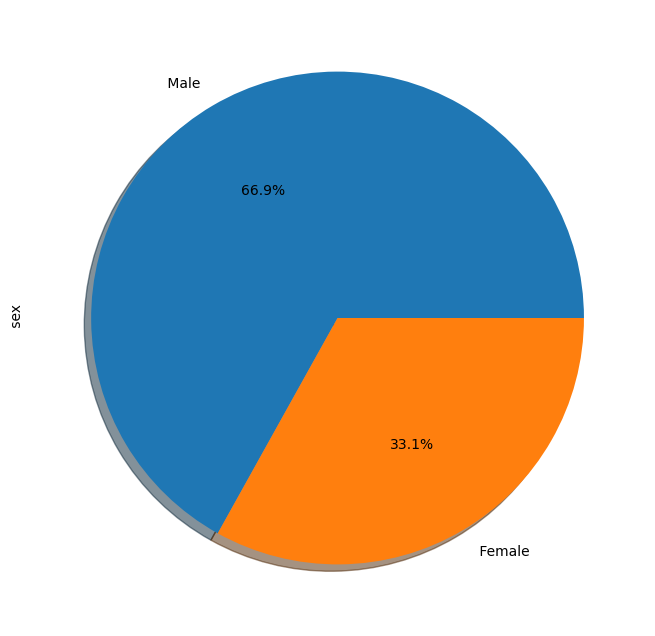

In [21]:
plt.figure(figsize=(10, 8))
income[' sex'].value_counts().plot.pie(autopct='%1.1f%%',shadow = True)
plt.show()

**The percentage of male is higher than female in our study**

### Hours Per Week Feature

In [22]:
income[' hours-per-week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name:  hours-per-week, dtype: float64

In [23]:
income[' hours-per-week'].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name:  hours-per-week, Length: 94, dtype: int64

#### Distribution

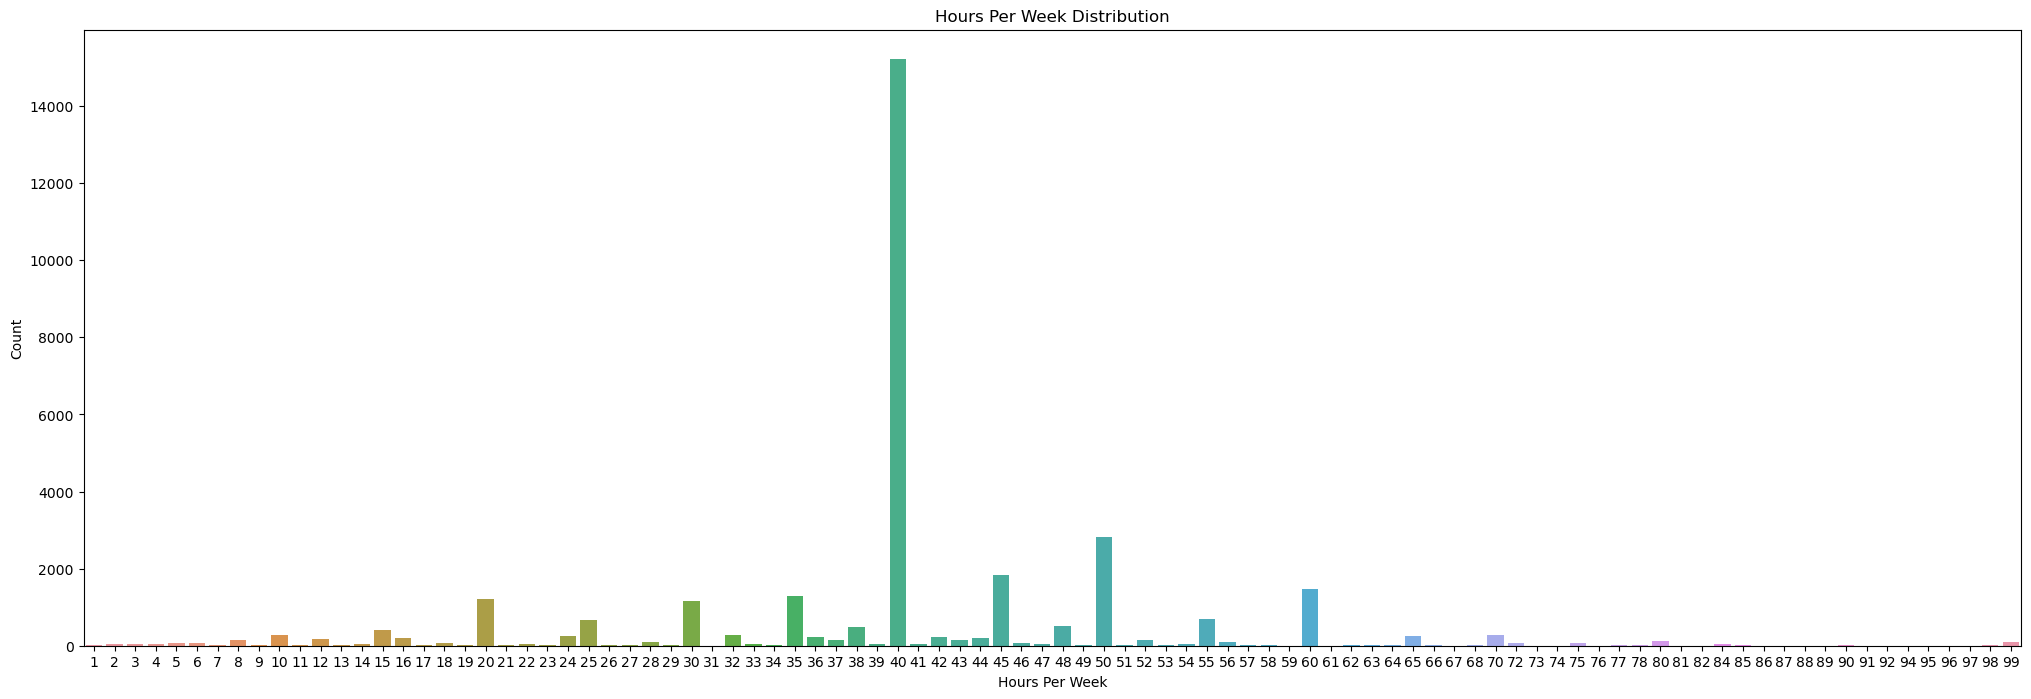

In [24]:
# Create a count plot using Seaborn
plt.figure(figsize=(25, 8))
sns.countplot(x=' hours-per-week', data=income)
plt.title('Hours Per Week Distribution')
plt.xlabel('Hours Per Week')
plt.ylabel('Count')
plt.show()


#### Outliers

Text(0.5, 1.0, 'Box Plot')

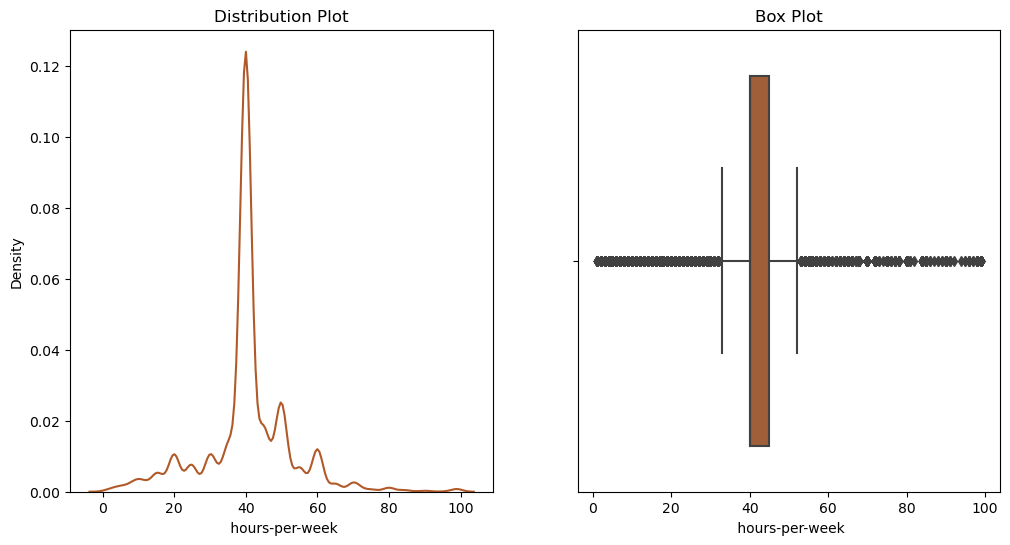

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot distribution 
sns.kdeplot(x=' hours-per-week', data=income, ax=axes[0] , color =  "#b15928" )
axes[0].set_title('Distribution Plot')

# Plot box plot
sns.boxplot(x=' hours-per-week', data=income, ax=axes[1] , color =  "#b15928")
axes[1].set_title('Box Plot')

In [26]:
# Calculate quartiles and IQR
q1 = np.percentile(income[' hours-per-week'], 25)
q3 = np.percentile(income[' hours-per-week'], 75)
iqr = q3 - q1
k = 1.5

# Calculate boundaries
lower_bound = q1 - k * iqr
upper_bound = q3 + k * iqr

print(f"upper_bound: {upper_bound}")
print(f"lower_bound: {lower_bound}")

upper_bound: 52.5
lower_bound: 32.5


**Hours Per Week feature has noraml distribution**

**All Hours Per Week values that greather than 52.5 are outliers by variance**

**All Hours Per Week values that lower than 32.5 are outliers by variance**

In [27]:
#to show the count of outliers
income[' hours-per-week'][income[' hours-per-week'] > 52.5].count() , income[' hours-per-week'][income[' hours-per-week'] < 32.5 ].count()

(3492, 5516)

**In Hours Per Week Feature We Have Large Number Of Outlires By Variance**

In [28]:
income[' hours-per-week'][income[' hours-per-week'] > 52.5].value_counts().head()

60    1475
55     694
70     291
65     244
80     133
Name:  hours-per-week, dtype: int64

In [29]:
 income[' hours-per-week'][income[' hours-per-week'] < 32.5 ].value_counts().head()

20    1224
30    1149
25     674
15     404
10     278
Name:  hours-per-week, dtype: int64

### Native Country  Feature

In [30]:
income[' native-country'].value_counts().head()

 United-States    29170
 Mexico             643
 ?                  583
 Philippines        198
 Germany            137
Name:  native-country, dtype: int64

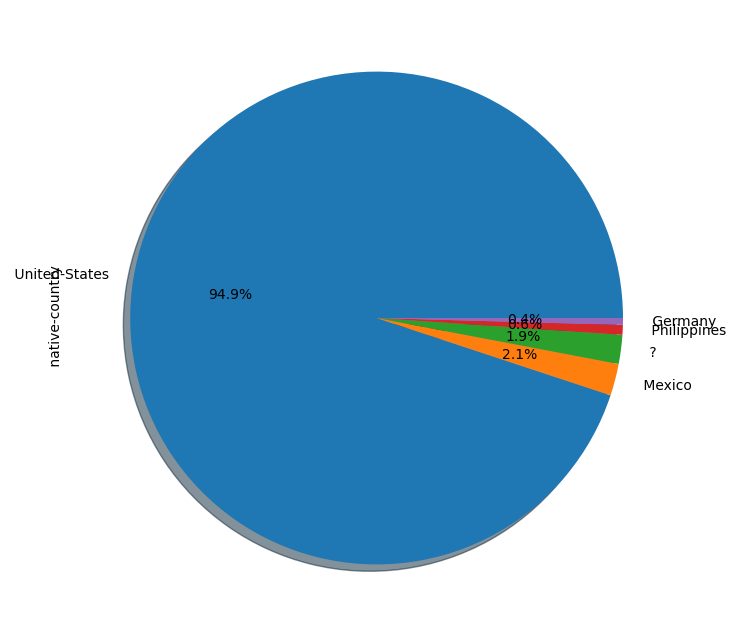

In [31]:
plt.figure(figsize=(10, 8))
income[' native-country'].value_counts().head().plot.pie(autopct='%1.1f%%',shadow = True)
plt.show()

**The most people are from US with 95%**

**This feature has very low variance so it won't impact on the target**

In [32]:
#drop the race column
income = income.drop(' native-country' , axis = 1) #because it has very low variance , so it won't impact on the target

### Income

In [33]:
income[' income'].value_counts()

 <=50K    24720
 >50K      7841
Name:  income, dtype: int64

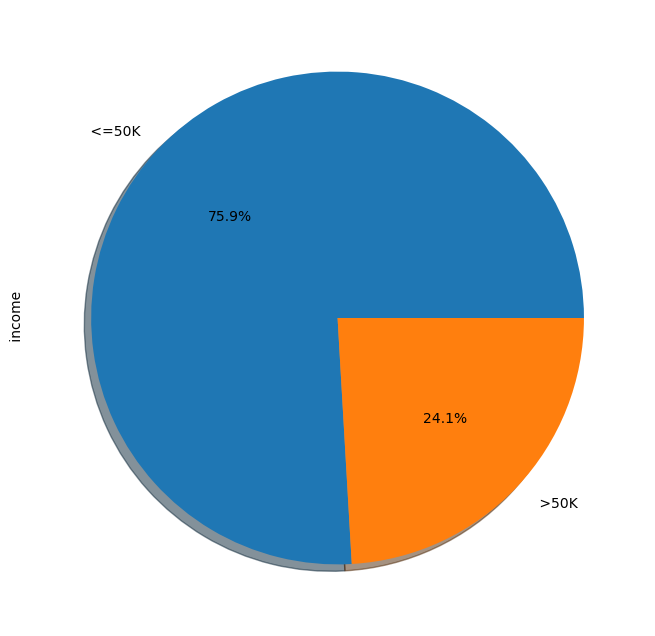

In [34]:
plt.figure(figsize=(10, 8))
income[' income'].value_counts().plot.pie(autopct='%1.1f%%',shadow = True)
plt.show()

**The percentage of income <= 50k is higher than income > 50k**

## Bivariate Analysis

### Education Feature & Education Number Features

In [35]:
income[' education'].value_counts() , income[' education-num'].value_counts()

( HS-grad         10501
  Some-college     7291
  Bachelors        5355
  Masters          1723
  Assoc-voc        1382
  11th             1175
  Assoc-acdm       1067
  10th              933
  7th-8th           646
  Prof-school       576
  9th               514
  12th              433
  Doctorate         413
  5th-6th           333
  1st-4th           168
  Preschool          51
 Name:  education, dtype: int64,
 9     10501
 10     7291
 13     5355
 14     1723
 11     1382
 7      1175
 12     1067
 6       933
 4       646
 15      576
 5       514
 8       433
 16      413
 3       333
 2       168
 1        51
 Name:  education-num, dtype: int64)

#### Distribution

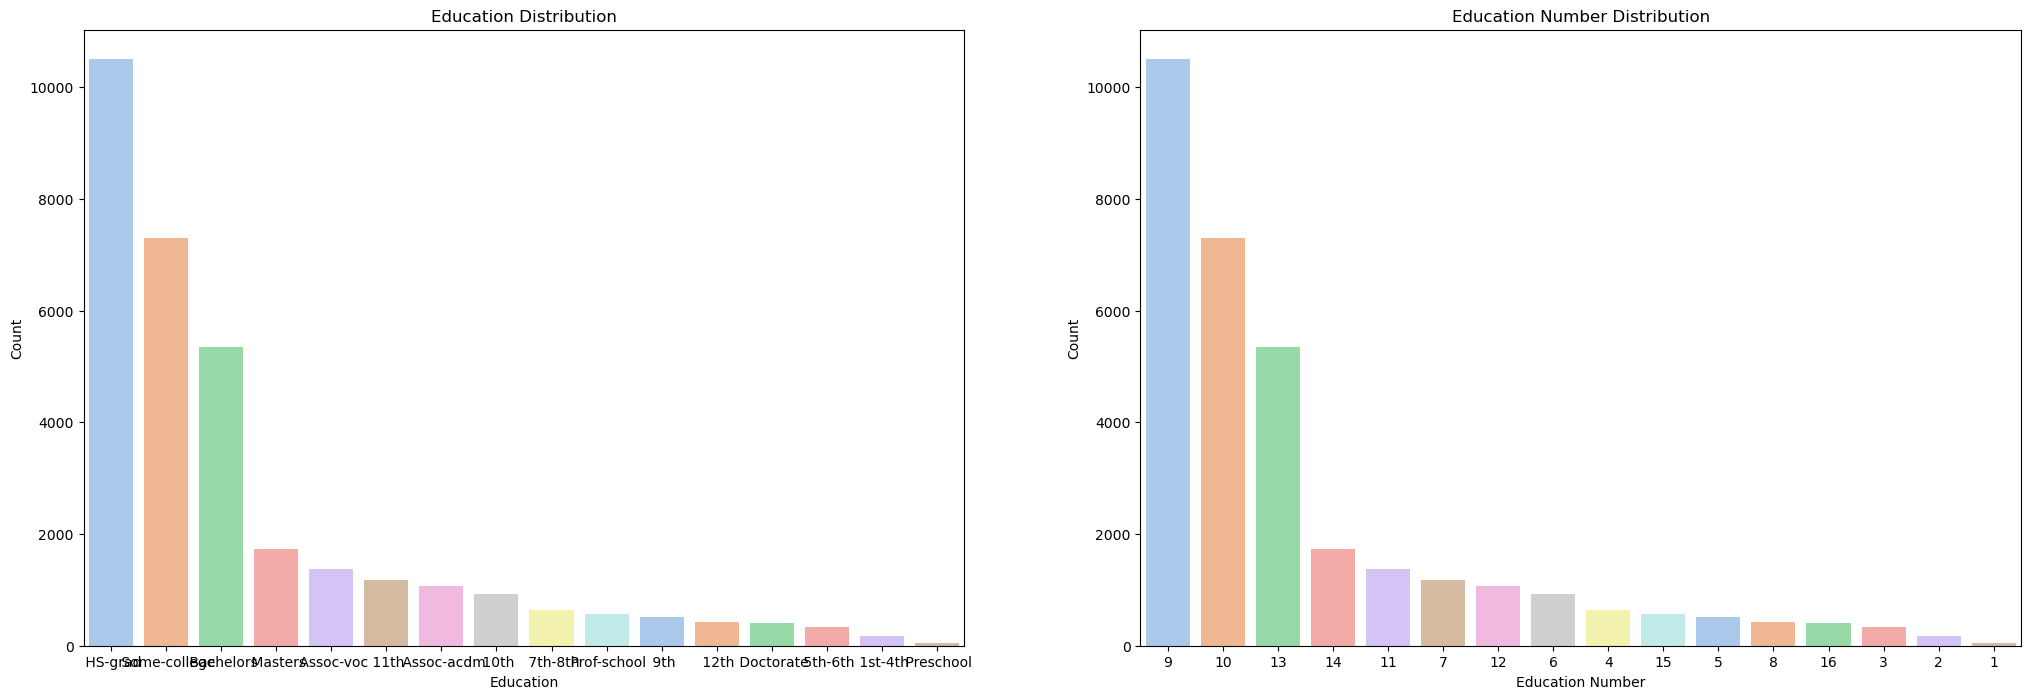

In [36]:
plt.figure(figsize=(25 , 8))

# Create a 1x2 grid for two plots side by side
plt.subplot(1, 2, 1)
education_order = income[' education'].value_counts().index
sns.countplot(x=' education', data=income, palette='pastel', order=education_order)
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
education_order_num = income[' education-num'].value_counts().index
sns.countplot(x=' education-num', data=income, palette='pastel', order=education_order_num)
plt.title('Education Number Distribution')
plt.xlabel('Education Number')
plt.ylabel('Count')


# Show the plots
plt.show()

**The 2 features have exactly the same distribution , They are highly correlated**

**The most frequent eduection is HS-grad that has eduection number 9**

#### Correlation

In [37]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(income[' education'], income[' education-num'])
chi2, _, _, _ = chi2_contingency(contingency_table)
# Calculate Cramér's V to show correlation between 2 categorical features
num_rows, num_cols = contingency_table.shape
cramers_v = (chi2 / (len(income) * (min(num_rows, num_cols) - 1)))**0.5

print(f"Cramér's V: {cramers_v}")


Cramér's V: 1.0


**The Correlation Between Education & Education Number Features = 1 , Highly Correlated**



In [38]:
#drop the education column
income = income.drop(' education' , axis = 1)

### Marital Status & Relationship Features  

In [39]:
income[' marital-status'].value_counts() , income[' relationship'].value_counts()

( Married-civ-spouse       14976
  Never-married            10683
  Divorced                  4443
  Separated                 1025
  Widowed                    993
  Married-spouse-absent      418
  Married-AF-spouse           23
 Name:  marital-status, dtype: int64,
  Husband           13193
  Not-in-family      8305
  Own-child          5068
  Unmarried          3446
  Wife               1568
  Other-relative      981
 Name:  relationship, dtype: int64)

#### Distribution

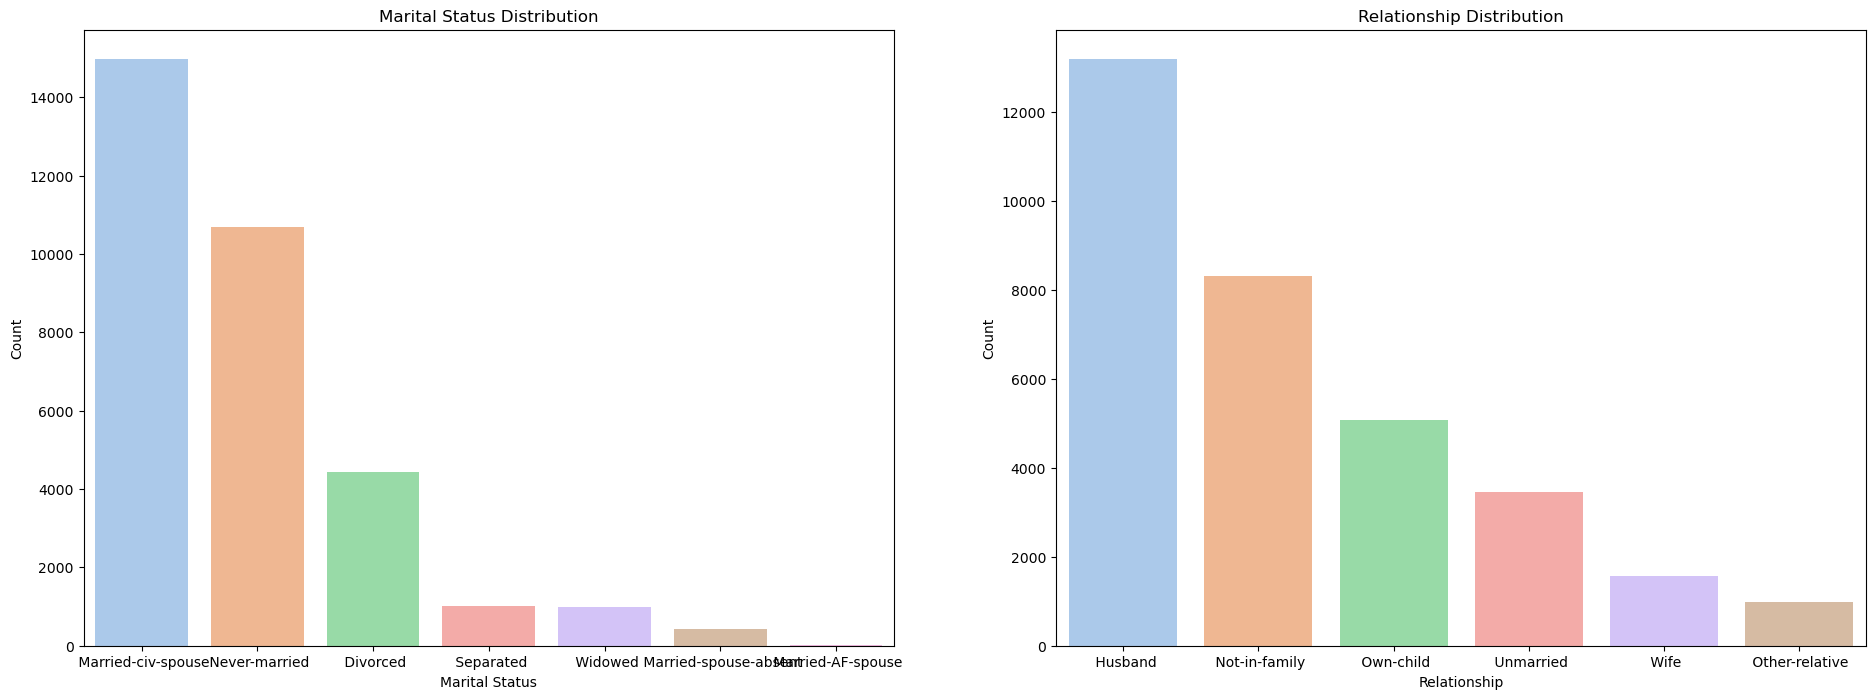

In [40]:
plt.figure(figsize=(23 , 8))

# Create a 1x2 grid for two plots side by side
plt.subplot(1, 2, 1)
education_order = income[' marital-status'].value_counts().index
sns.countplot(x=' marital-status', data=income, palette='pastel', order=education_order)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
education_order_num = income[' relationship'].value_counts().index
sns.countplot(x=' relationship', data=income, palette='pastel', order=education_order_num)
plt.title('Relationship Distribution')
plt.xlabel('Relationship')
plt.ylabel('Count')

# Show the plots
plt.show()

**The 2 features have convergent distribution**

<Axes: xlabel=' marital-status', ylabel='count'>

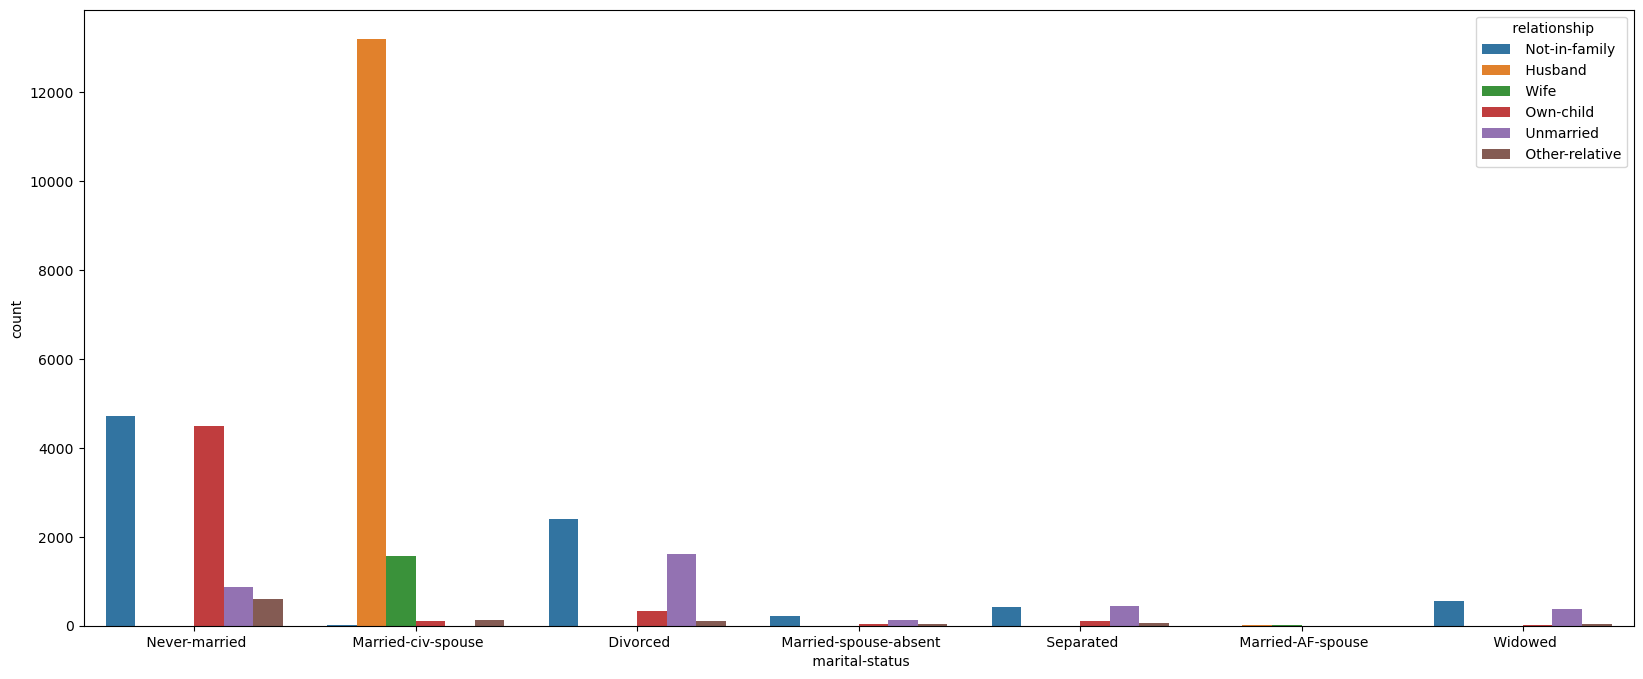

In [41]:
plt.figure(figsize=(20 , 8))
sns.countplot(income , x=' marital-status', hue=' relationship')

#### Correlation

In [42]:
contingency_table = pd.crosstab(income[' marital-status'], income[' relationship'])

# Perform the chi-squared test
chi2, _, _, _ = chi2_contingency(contingency_table)

# Calculate Cramér's V
num_rows, num_cols = contingency_table.shape
cramers_v = (chi2 / (len(income) * (min(num_rows, num_cols) - 1)))**0.5

print(f"Cramér's V: {cramers_v:.1f}")


Cramér's V: 0.5


**The Correlation Between Marital Status & Relationship = 0.5 , Correlated**

### Work Class & Occupation Features

In [43]:
income[' workclass'].value_counts() , income[' occupation'].value_counts()

( Private             22696
  Self-emp-not-inc     2541
  Local-gov            2093
  ?                    1836
  State-gov            1298
  Self-emp-inc         1116
  Federal-gov           960
  Without-pay            14
  Never-worked            7
 Name:  workclass, dtype: int64,
  Prof-specialty       4140
  Craft-repair         4099
  Exec-managerial      4066
  Adm-clerical         3770
  Sales                3650
  Other-service        3295
  Machine-op-inspct    2002
  ?                    1843
  Transport-moving     1597
  Handlers-cleaners    1370
  Farming-fishing       994
  Tech-support          928
  Protective-serv       649
  Priv-house-serv       149
  Armed-Forces            9
 Name:  occupation, dtype: int64)

**'?' is a wrong value , we will handle it by drop it**

#### Handling The Wrong Values

In [44]:
#to drop all rows that have '?' value
income = income[(income[' workclass'] != ' ?') & (income[' occupation'] != ' ?')]

In [45]:
income[' workclass'].describe() #as we shown the number of rows drop from 328237 to 30718

count        30718
unique           7
top        Private
freq         22696
Name:  workclass, dtype: object

#### Correlation

In [46]:
contingency_table = pd.crosstab(income[' workclass'], income[' occupation'])

# Perform the chi-squared test
chi2, _, _, _ = chi2_contingency(contingency_table)

# Calculate Cramér's V
num_rows, num_cols = contingency_table.shape
cramers_v = (chi2 / (len(income) * (min(num_rows, num_cols) - 1)))**0.5

print(f"Cramér's V: {cramers_v:.1f}")

Cramér's V: 0.2


**The Correlation Between Work Class & Occupation = 0.2 , Not Correlated**

### Capital Gain & Capital Loss


In [47]:
income[' capital-gain'].describe() #Higer than 75%  of Capital Gain are zeros !

count    30718.000000
mean      1106.037079
std       7497.863364
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name:  capital-gain, dtype: float64

In [48]:
income[' capital-loss'].describe() #Higer than 75% of capital-loss are zeros !

count    30718.000000
mean        88.910216
std        405.657203
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name:  capital-loss, dtype: float64

#### Outliers

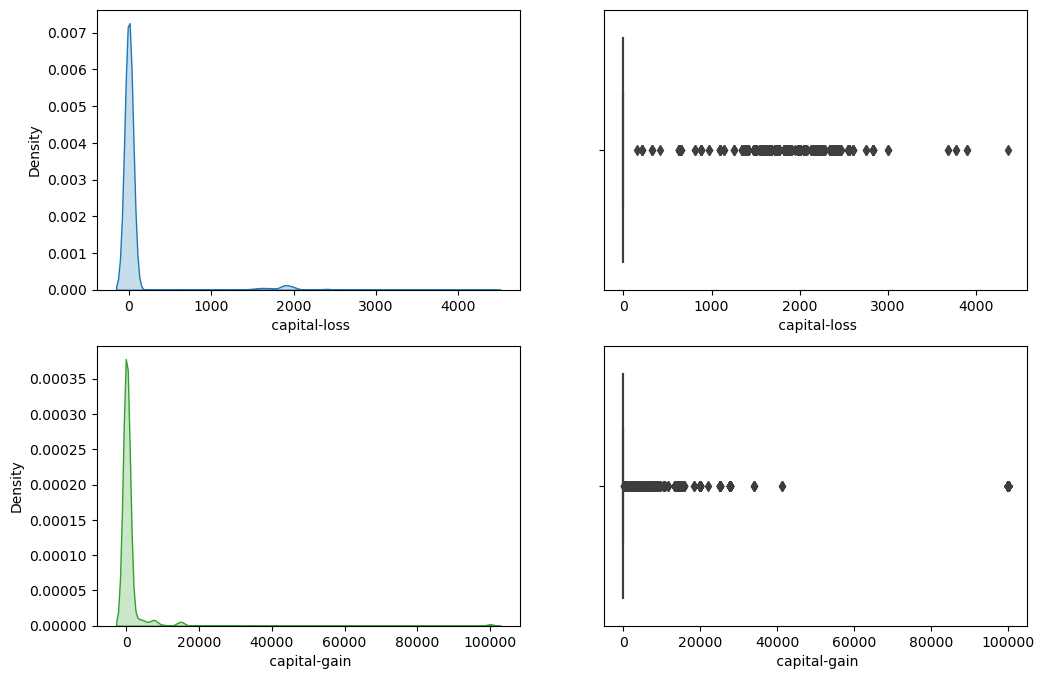

In [49]:
feature_colors = ["#1f78b4", "#33a02c"]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Enumerate over columns and their corresponding colors
for i, (feature, color) in enumerate(zip([' capital-loss', ' capital-gain'], feature_colors)):
    # KDE plot
    sns.kdeplot(data=income, x=feature, fill=True, color=color, ax=ax[i, 0])
    
    # Boxplot
    sns.boxplot(data=income, x=feature, color=color, orient="h", ax=ax[i, 1])


plt.show()


**Higer than 75%  of Capital Gain are zeros**

**Higer than 75% of capital-loss are zeros**

**Capital Gain & Capital Loss features have low variance** 

In [50]:
# Calculate quartiles and IQR of capital-gain
q1 = np.percentile(income[' capital-gain'], 25)
q3 = np.percentile(income[' capital-gain'], 75)
iqr = q3 - q1
k = 1.5

# Calculate boundaries
lower_bound = q1 - k * iqr
upper_bound = q3 + k * iqr

print(f"upper_bound of capital-gain : {upper_bound}")

upper_bound of capital-gain : 0.0


In [51]:
# Calculate quartiles and IQR of capital-loss
q1 = np.percentile(income[' capital-loss'], 25)
q3 = np.percentile(income[' capital-loss'], 75)
iqr = q3 - q1
k = 1.5

# Calculate boundaries
lower_bound = q1 - k * iqr
upper_bound = q3 + k * iqr

print(f"upper_bound of capital-loss: {upper_bound}")

upper_bound of capital-loss: 0.0


**All values that greater than 0 are outliers by variance in capital-gain**

**All values that greater than 0 are outliers by variance in capital-loss**

#### Information Gain

In [52]:
import numpy as np

value_counts_capital_gain = income[' capital-gain'].value_counts(normalize=True)
entropy_capital_gain = -np.sum(value_counts_capital_gain * np.log2(value_counts_capital_gain))

value_counts_capital_loss = income[' capital-loss'].value_counts(normalize=True)
entropy_capital_loss = -np.sum(value_counts_capital_loss * np.log2(value_counts_capital_loss))

print(f"Entropy Of capital-gain : {entropy_capital_gain:.2f}")
print(f"Entropy Of capital-loss : {entropy_capital_loss:.2f}")

Entropy Of capital-gain : 0.87
Entropy Of capital-loss : 0.52


**The Information Gain of capital-loss higher than capital-gain**

#### Correlation

In [53]:
correlation_coefficient =income[' capital-gain'].corr(income[' capital-loss'])

print(f"Correlation Coefficient: {correlation_coefficient :.2f}")

Correlation Coefficient: -0.03


**The Correlation Between Capital Gain & Capital Loss = -0.03 , Not Correlated**

## Preprocessing

### Delete The Duplicates Rows

In [54]:
duplicated_rows = income.duplicated().sum() #to  show the number of duplicated_rows
print(f"duplicated_rows : {duplicated_rows}")

duplicated_rows : 25


In [55]:
income.shape #the shape befor drop all duplicated_rows

(30718, 12)

In [56]:
income.drop_duplicates(inplace=True) #to drop all duplicated_rows
income.shape #the shape after drop all duplicated_rows

(30693, 12)

### Encoding The Categorical Features

In [57]:
income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30693 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              30693 non-null  int64 
 1    workclass       30693 non-null  object
 2    fnlwgt          30693 non-null  int64 
 3    education-num   30693 non-null  int64 
 4    marital-status  30693 non-null  object
 5    occupation      30693 non-null  object
 6    relationship    30693 non-null  object
 7    sex             30693 non-null  object
 8    capital-gain    30693 non-null  int64 
 9    capital-loss    30693 non-null  int64 
 10   hours-per-week  30693 non-null  int64 
 11   income          30693 non-null  object
dtypes: int64(6), object(6)
memory usage: 3.0+ MB


In [58]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = income.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform each categorical column
for col in categorical_cols:
    income[col] = encoder.fit_transform(income[col])
    

income.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,income
0,39,5,77516,13,4,0,1,1,2174,0,40,0
1,50,4,83311,13,2,3,0,1,0,0,13,0
2,38,2,215646,9,0,5,1,1,0,0,40,0
3,53,2,234721,7,2,5,0,1,0,0,40,0
4,28,2,338409,13,2,9,5,0,0,0,40,0


### Feature Selection

#### Correlation Between  Features With Each Other

In [59]:
features = income.drop(' income' , axis = 1)
features

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week
0,39,5,77516,13,4,0,1,1,2174,0,40
1,50,4,83311,13,2,3,0,1,0,0,13
2,38,2,215646,9,0,5,1,1,0,0,40
3,53,2,234721,7,2,5,0,1,0,0,40
4,28,2,338409,13,2,9,5,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,12,2,12,5,0,0,0,38
32557,40,2,154374,9,2,6,0,1,0,0,40
32558,58,2,151910,9,6,0,4,0,0,0,40
32559,22,2,201490,9,4,0,3,1,0,0,20


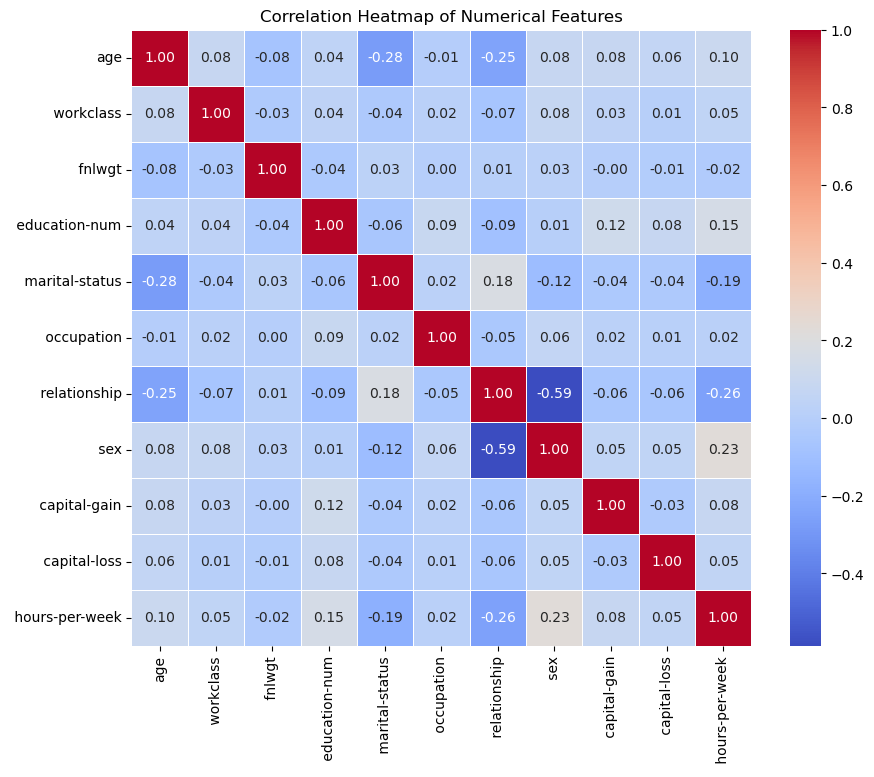

In [60]:
#we used corr() method because all features are numeric
correlation_matrix = features.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [61]:
# Set the correlation threshold
correlation_threshold = 0.5

# Find pairs of features that meet the correlation threshold
highly_correlated_pairs = (correlation_matrix.abs() >= correlation_threshold) & (correlation_matrix.abs() < 1)

# Extract the indices where the condition is True
correlated_features = np.where(highly_correlated_pairs)

# Create a list of tuples containing the highly correlated features
correlated_feature_pairs = list(zip(features.columns[correlated_features[0]], features.columns[correlated_features[1]]))

correlated_feature_pairs

[(' relationship', ' sex'), (' sex', ' relationship')]

In [62]:
#drop the relationship column because it's correlated with sex
income = income.drop(' relationship' , axis = 1)

#### Correlation Between  Features & Target

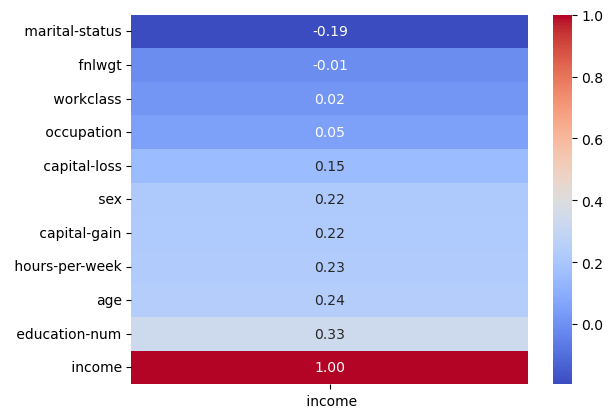

In [63]:
features_with_targert = income

#we used corr() method because all features are numeric
correlation_matrix = features_with_targert.corr()
correlation_matrix = correlation_matrix.sort_values(by = ' income' , ascending = True )

#heat map
sns.heatmap(correlation_matrix[[' income']], annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

#### KBest Features 

In [64]:
from sklearn.feature_selection import SelectKBest , f_classif

X = income.drop(' income' , axis = 1 )
Y = income[' income']


selector = SelectKBest(f_classif, k=7)
X_important = selector.fit_transform(X , Y)
mask = selector.get_support()
important_feature_names = X.columns[mask]

print(important_feature_names)


Index(['age', ' education-num', ' marital-status', ' sex', ' capital-gain',
       ' capital-loss', ' hours-per-week'],
      dtype='object')


In [65]:
# Set the correlation threshold
correlation_threshold = 0.15

low_correlated_features = (correlation_matrix[[' income']].abs() < correlation_threshold) & (correlation_matrix[[' income']].abs() < 1)
low_correlated_features = low_correlated_features[low_correlated_features[' income'] == True].index
low_correlated_features

Index([' fnlwgt', ' workclass', ' occupation'], dtype='object')

In [66]:
#drop low_correlated_features
income = income.drop(low_correlated_features , axis = 1)
income.head() #final features

,age,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,income
0,39,13,4,1,2174,0,40,0
1,50,13,2,1,0,0,13,0
2,38,9,0,1,0,0,40,0
3,53,7,2,1,0,0,40,0
4,28,13,2,0,0,0,40,0


### Distributions For Final Features

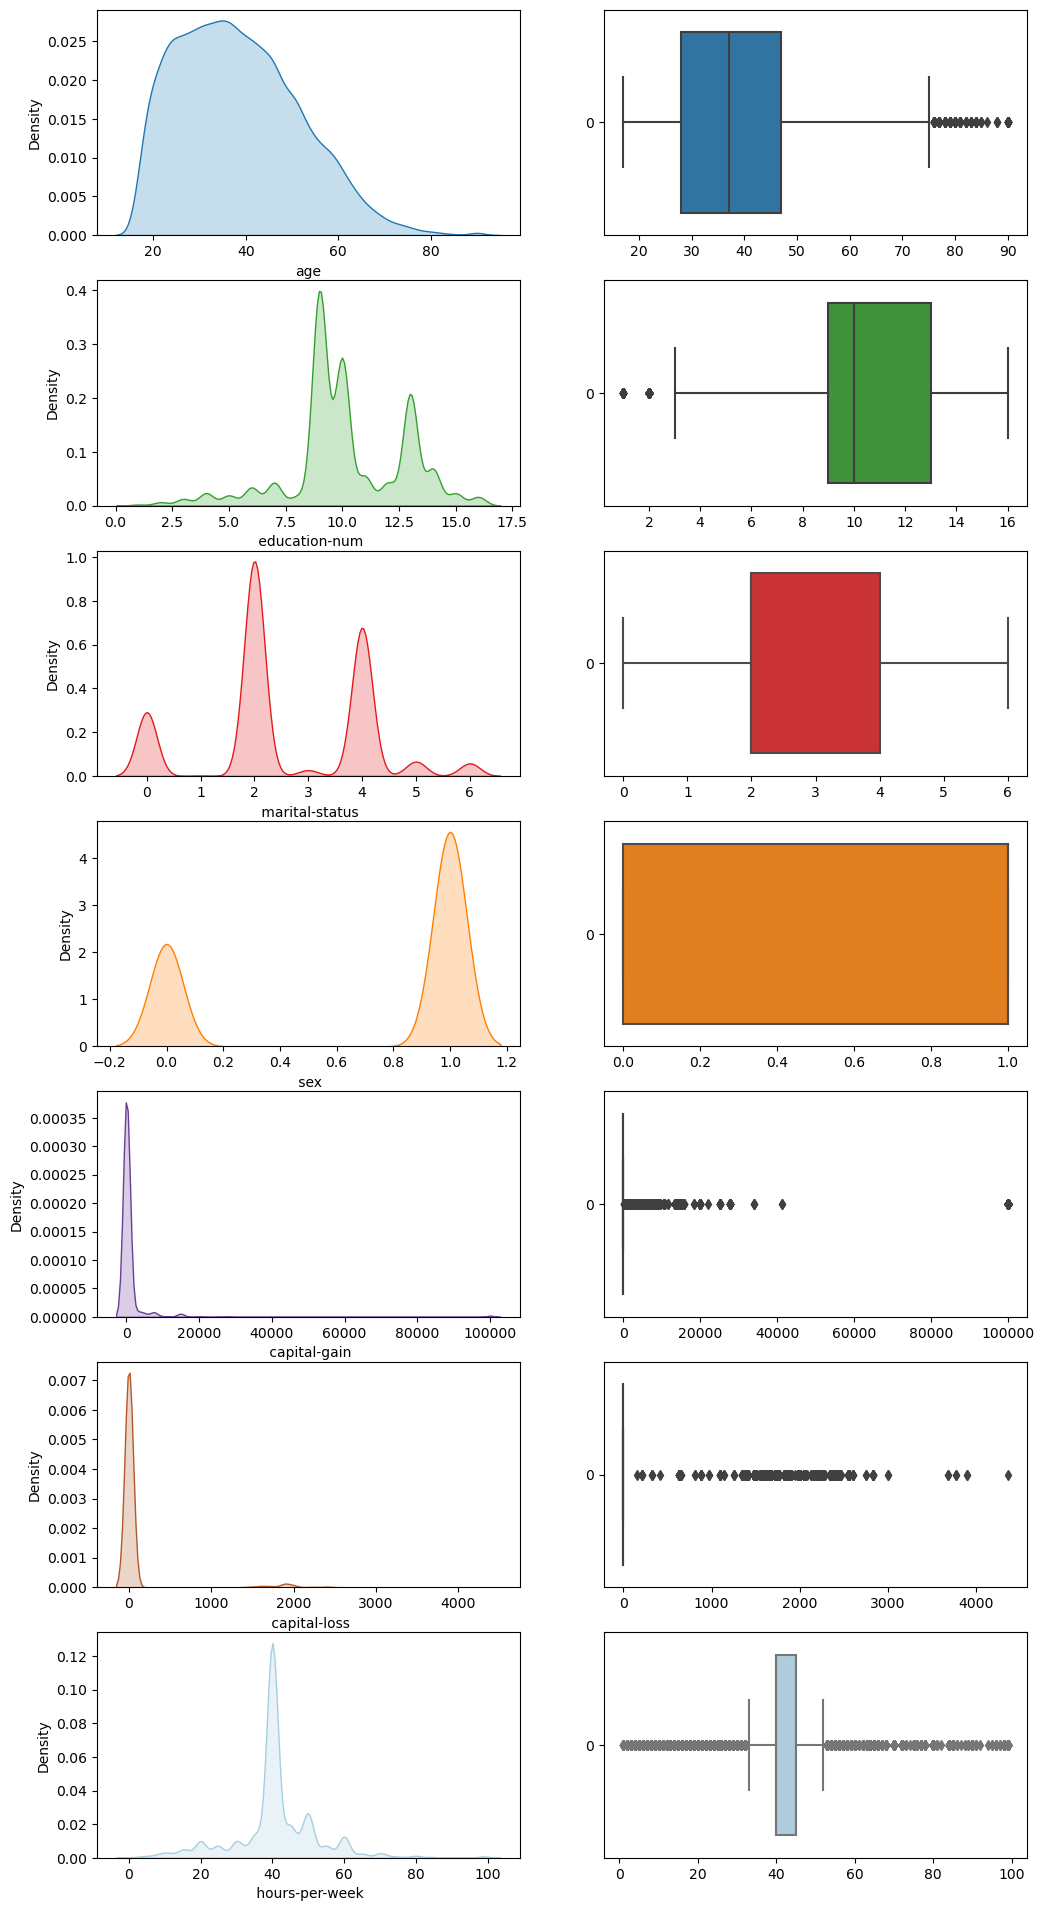

In [67]:
# Define custom colors for each feature
feature_colors = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#b15928", "#a6cee3"]

fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(12, 24))

for i in range(7):
    sns.kdeplot(income.iloc[:, i],
                fill=True,
                color=feature_colors[i],
                ax=ax[i, 0])

    sns.boxplot(data=income.iloc[:, i],
                color=feature_colors[i], orient="h",
                ax=ax[i, 1])

plt.show()



### Remove Outlires


**in capital gain & capital loss features the outlires are all values that grather than 0**

**we can't remove them , because if we did it , these columns will have just one value = 0**

In [68]:
#Calculate quartiles and IQR of age
q1 = np.percentile(income['age'], 25)
q3 = np.percentile(income['age'], 75)
iqr = q3 - q1
k = 1.5

# Calculate boundaries
lower_bound = q1 - k * iqr
upper_bound = q3 + k * iqr

print(f"upper_bound of age: {upper_bound}")

upper_bound of age: 75.5


In [69]:
#to drop outlires in age
income = income[income['age'] <= upper_bound ]

In [70]:
income

,age,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,income
0,39,13,4,1,2174,0,40,0
1,50,13,2,1,0,0,13,0
2,38,9,0,1,0,0,40,0
3,53,7,2,1,0,0,40,0
4,28,13,2,0,0,0,40,0
...,...,...,...,...,...,...,...,...
32556,27,12,2,0,0,0,38,0
32557,40,9,2,1,0,0,40,1
32558,58,9,6,0,0,0,40,0
32559,22,9,4,1,0,0,20,0


## Assign The Dependent And Independent Variables

In [71]:
X = income.iloc[ : , : -1]
y = income.iloc[ : , -1]

X , y

(       age   education-num   marital-status   sex   capital-gain  \
 0       39              13                4     1           2174   
 1       50              13                2     1              0   
 2       38               9                0     1              0   
 3       53               7                2     1              0   
 4       28              13                2     0              0   
 ...    ...             ...              ...   ...            ...   
 32556   27              12                2     0              0   
 32557   40               9                2     1              0   
 32558   58               9                6     0              0   
 32559   22               9                4     1              0   
 32560   52               9                2     0          15024   
 
         capital-loss   hours-per-week  
 0                  0               40  
 1                  0               13  
 2                  0               40  
 3    

## Plot The Data Befor Modeling

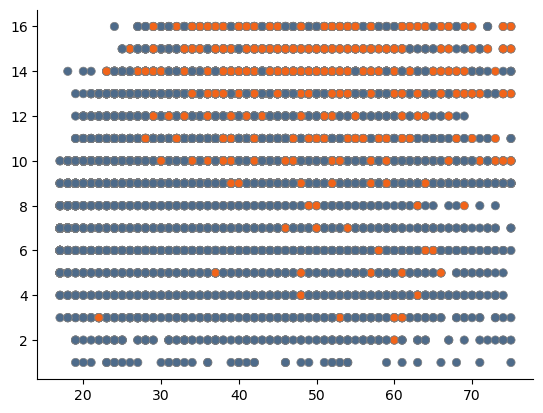

In [72]:
colors = ['#4E6B8A' if v == 0 else '#F26419' for v in y]
fig = plt.Figure(figsize=(12,8))
plt.scatter(X.values[:, 0], X.values[:, 1], c=colors, edgecolors='grey', linewidths=0.5)
sns.despine()

## Split The Data

In [73]:
from sklearn.model_selection import train_test_split


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

X_train, X_test, y_train, y_test

(       age   education-num   marital-status   sex   capital-gain  \
 21239   44               9                2     1              0   
 7432    46              10                2     1              0   
 2234    33               4                2     1              0   
 21953   23              10                4     1              0   
 14064   61               9                2     1              0   
 ...    ...             ...              ...   ...            ...   
 14004   60              14                2     0           3103   
 20969   34              14                4     1              0   
 10521   36               9                2     1              0   
 11548   47              13                2     0              0   
 2937    19               9                4     1              0   
 
         capital-loss   hours-per-week  
 21239              0               40  
 7432            1887               45  
 2234               0               40  
 21953

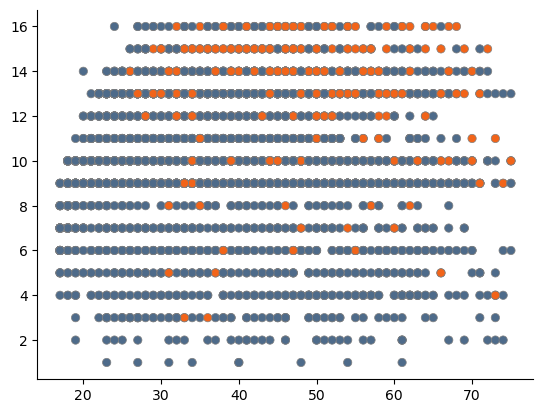

In [74]:
colors = ['#4E6B8A' if v == 0 else '#F26419' for v in y_test]
fig = plt.Figure(figsize=(12,8))
plt.scatter(X_test.values[:, 0], X_test.values[:, 1], c=colors, edgecolors='grey', linewidths=0.5)
sns.despine()

## Standardization 

In [75]:
X_train.columns

Index(['age', ' education-num', ' marital-status', ' sex', ' capital-gain',
       ' capital-loss', ' hours-per-week'],
      dtype='object')

In [76]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)


# Transform both the training and test data using the scaler
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


X_train

array([[ 0.46270591, -0.44623932, -0.39070701, ..., -0.14530883,
        -0.21865928, -0.08364834],
       [ 0.61974246, -0.05399355, -0.39070701, ..., -0.14530883,
         4.45807917,  0.33757435],
       [-0.4009951 , -2.40746818, -0.39070701, ..., -0.14530883,
        -0.21865928, -0.08364834],
       ...,
       [-0.16544028, -0.44623932, -0.39070701, ..., -0.14530883,
        -0.21865928,  1.34850879],
       [ 0.69826073,  1.12274376, -0.39070701, ..., -0.14530883,
        -0.21865928,  0.33757435],
       [-1.50025092, -0.44623932,  0.95370097, ..., -0.14530883,
        -0.21865928, -0.08364834]])

## Data Resampling

In [77]:
y_train.value_counts()

0    17237
1     5654
Name:  income, dtype: int64

In [78]:
from imblearn.combine import SMOTEENN

#create object from SMOTEENN class
SMOTEENN = SMOTEENN( random_state=42 , sampling_strategy  =  'all'  )
X_train_resampled, y_train_resampled = SMOTEENN.fit_resample(X_train, y_train)

In [79]:
y_train_resampled.value_counts() #the class 0 decreased [major]
                                 #the class 1 increased [minor]

0    12424
1     9825
Name:  income, dtype: int64

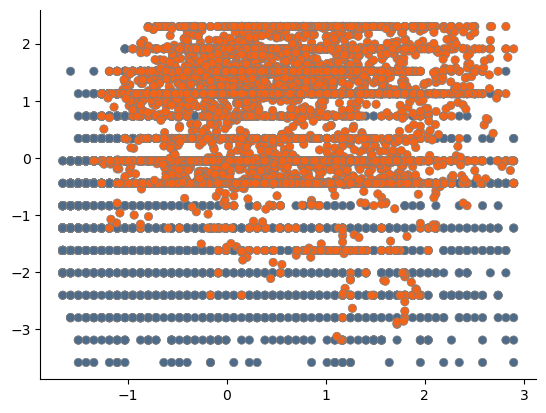

In [80]:
colors = ['#4E6B8A' if v == 0 else '#F26419' for v in y_train_resampled]
fig = plt.Figure(figsize=(12,8))
plt.scatter(X_train_resampled[:, 0], X_train_resampled[:, 1], c=colors, edgecolors='grey', linewidths=0.5)
sns.despine()

**There is high overlapping between the 2 classes after resampling , i will keep it unbalanced !**

**Because it will change the pattern of data in traning data set , it will cause overfitting ..**

**2)** Model Building

## SVM

### Training The Model

In [81]:
from sklearn.svm import SVC

svm = SVC(C = 1, kernel='rbf' , gamma = 1 , random_state = 0)
svm.fit(X_train,y_train)

SVC(C=1, gamma=1, random_state=0)

### Prediction

In [82]:
y_pred_train = svm.predict(X_train)
y_pred_test_svm = svm.predict(X_test)

In [83]:
result_train = np.concatenate((y_train.values.reshape(-1, 1), y_pred_train.reshape(-1, 1)), axis=1)
result_train

array([[0, 0],
       [1, 1],
       [0, 0],
       ...,
       [0, 0],
       [0, 1],
       [0, 0]])

In [84]:
result_test = np.concatenate((y_test.values.reshape(-1, 1), y_pred_test_svm.reshape(-1, 1)), axis=1)
result_test

array([[0, 0],
       [1, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 1]])

### Evaluation

#### Confusion Matrix

In [85]:
from sklearn.metrics import accuracy_score , confusion_matrix

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test_svm)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.86
Test Accuracy: 0.84


In [86]:
#confusion_matrix for testing

conf_matrix = confusion_matrix(y_test, y_pred_test_svm)
conf_matrix

array([[5347,  320],
       [ 901, 1063]], dtype=int64)

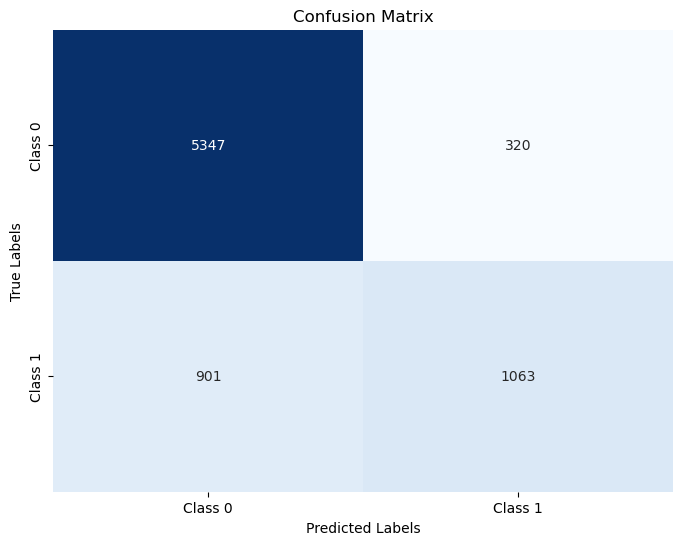

In [87]:
# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

#### Classification Report

In [88]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_test_svm)

print("Testing Classification Report:")
print(report)

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5667
           1       0.77      0.54      0.64      1964

    accuracy                           0.84      7631
   macro avg       0.81      0.74      0.77      7631
weighted avg       0.83      0.84      0.83      7631



## Decision Tree

### Training The Model

In [89]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(criterion='entropy' ,  random_state=0 , max_depth = 10 , max_leaf_nodes = 50)

DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=50,
                       random_state=0)

# Prediction

In [90]:
y_pred_train = DT.predict(X_train)
y_pred_test_DT = DT.predict(X_test)

In [91]:
result_train = np.concatenate((y_train.values.reshape(-1, 1), y_pred_train.reshape(-1, 1)), axis=1)
result_train

array([[0, 0],
       [1, 1],
       [0, 0],
       ...,
       [0, 0],
       [0, 1],
       [0, 0]])

In [92]:
result_test = np.concatenate((y_test.values.reshape(-1, 1), y_pred_test_DT.reshape(-1, 1)), axis=1)
result_test

array([[0, 0],
       [1, 1],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

### Evaluation

In [93]:
from sklearn.metrics import accuracy_score , confusion_matrix

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test_DT)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.85
Test Accuracy: 0.84


In [94]:
conf_matrix = confusion_matrix(y_test, y_pred_test_DT)
conf_matrix

array([[5392,  275],
       [ 915, 1049]], dtype=int64)

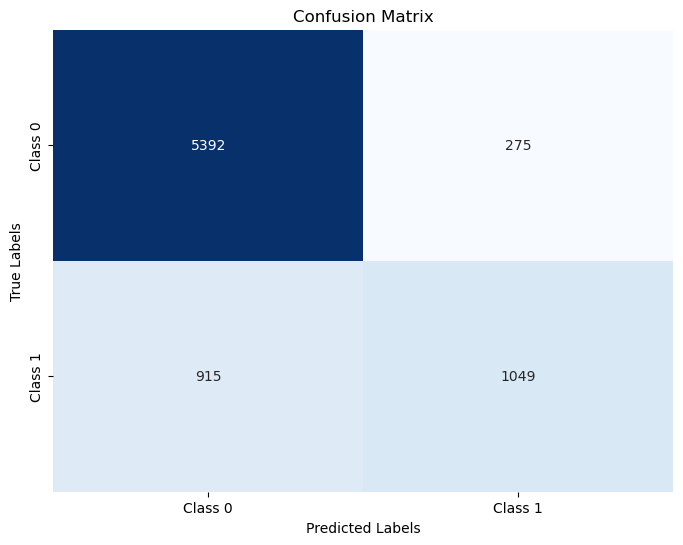

In [95]:
# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [96]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_test_DT)

print("Testing Classification Report:")
print(report)

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      5667
           1       0.79      0.53      0.64      1964

    accuracy                           0.84      7631
   macro avg       0.82      0.74      0.77      7631
weighted avg       0.84      0.84      0.83      7631



# Plotting 

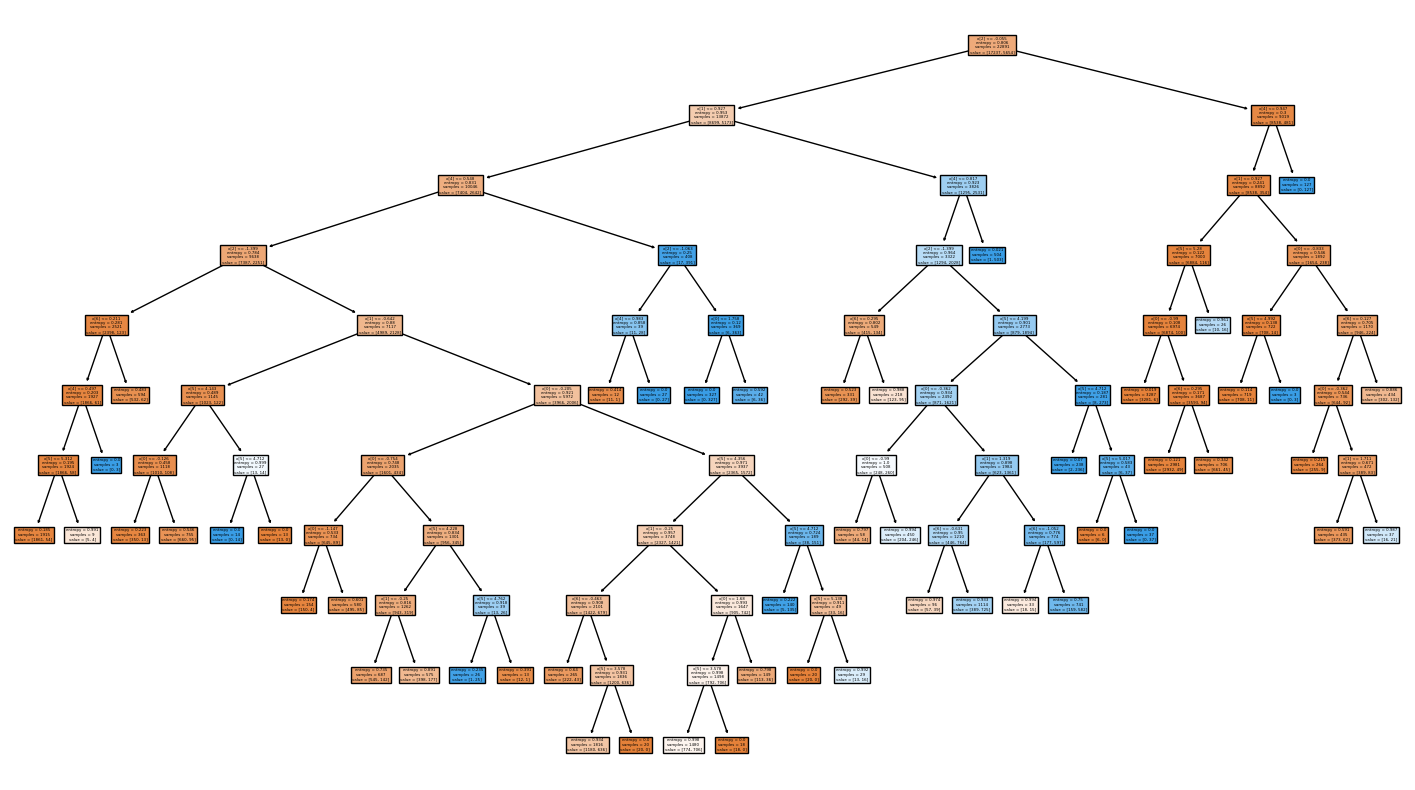

In [97]:
from sklearn.tree import plot_tree

plt.figure(figsize=(18, 10))
plot_tree(DT, filled=True)
plt.show()

## Random Forest 

### Training The Model

In [98]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 50, criterion='entropy' , random_state = 0 , max_depth = 9 , max_leaf_nodes = 50 )
RF.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, max_leaf_nodes=50,
                       n_estimators=50, random_state=0)

### Prediction

In [99]:
y_pred_train = RF.predict(X_train)
y_pred_test_RF = RF.predict(X_test)

In [100]:
result_train = np.concatenate((y_train.values.reshape(-1, 1), y_pred_train.reshape(-1, 1)), axis=1)
result_train

array([[0, 0],
       [1, 1],
       [0, 0],
       ...,
       [0, 0],
       [0, 1],
       [0, 0]])

In [101]:
result_test = np.concatenate((y_test.values.reshape(-1, 1), y_pred_test_RF.reshape(-1, 1)), axis=1)
result_test

array([[0, 0],
       [1, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

### Evaluation

In [102]:
from sklearn.metrics import accuracy_score , confusion_matrix

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test_RF)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.85
Test Accuracy: 0.85


In [103]:
conf_matrix = confusion_matrix(y_test, y_pred_test_RF)
conf_matrix

array([[5422,  245],
       [ 920, 1044]], dtype=int64)

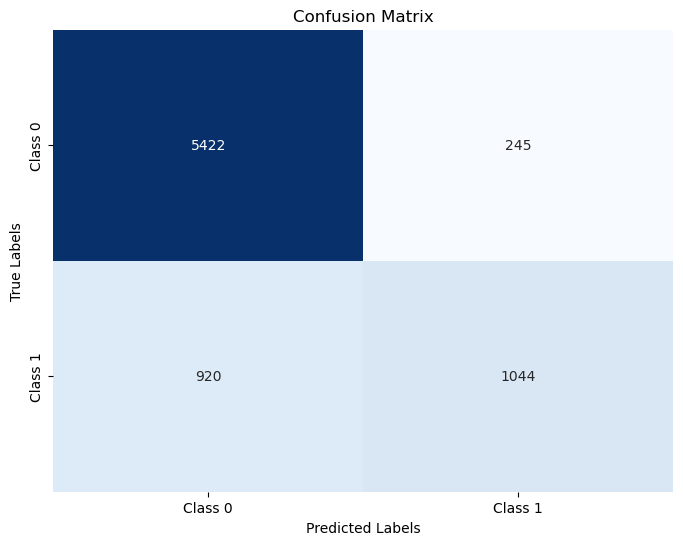

In [104]:
# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [105]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_test_RF)

print("Testing Classification Report:")
print(report)


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      5667
           1       0.81      0.53      0.64      1964

    accuracy                           0.85      7631
   macro avg       0.83      0.74      0.77      7631
weighted avg       0.84      0.85      0.84      7631



## KNNs

### Select The Best K

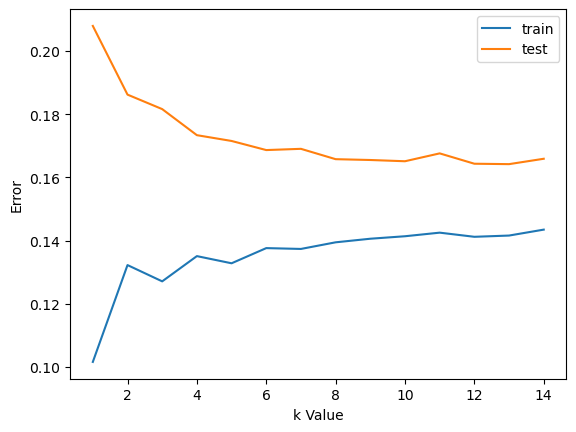

In [106]:
from sklearn.neighbors import KNeighborsClassifier

error1= []
error2= []


for k in range(1,15):

    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)

    y_pred1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred1))

    y_pred2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred2))




plt.plot(range(1,15),error1,label="train")
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

### Training The Model

In [107]:
knn= KNeighborsClassifier(n_neighbors=12 , weights = 'distance' , metric = 'minkowski')
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12, weights='distance')

### Prediction

In [108]:
y_pred_train = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

In [109]:
result_train = np.concatenate((y_train.values.reshape(-1, 1), y_pred_train.reshape(-1, 1)), axis=1)
result_train

array([[0, 0],
       [1, 1],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

In [110]:
result_test = np.concatenate((y_test.values.reshape(-1, 1), y_pred_test_knn.reshape(-1, 1)), axis=1)
result_test

array([[0, 0],
       [1, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 1]])

### Evaluation

In [111]:
from sklearn.metrics import accuracy_score , confusion_matrix

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test_knn)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.92
Test Accuracy: 0.83


In [112]:
conf_matrix = confusion_matrix(y_test, y_pred_test_knn)
conf_matrix

array([[5209,  458],
       [ 850, 1114]], dtype=int64)

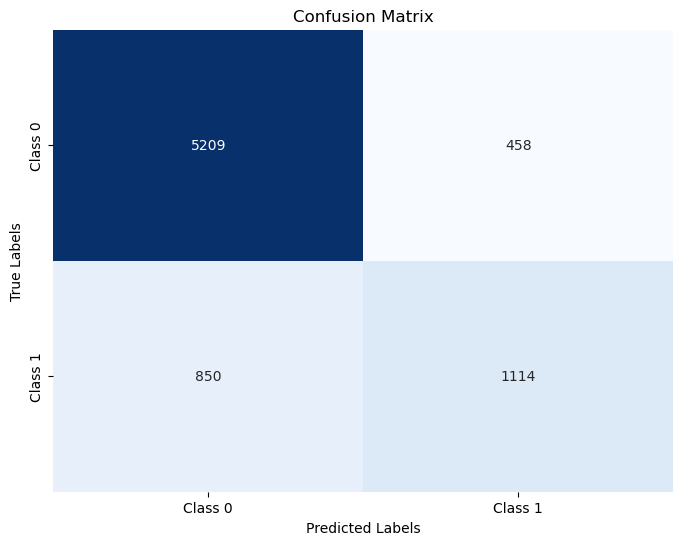

In [113]:
# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [114]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_test_knn)

print("Testing Classification Report:")
print(report)


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      5667
           1       0.71      0.57      0.63      1964

    accuracy                           0.83      7631
   macro avg       0.78      0.74      0.76      7631
weighted avg       0.82      0.83      0.82      7631



**3)** Model Evaluation

In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

data = {
    'Model': ['Random_Forest', 'Decision_Tree', 'SVM', 'KNN'],
    'accuracy': [
        accuracy_score(y_test, y_pred_test_RF),
        accuracy_score(y_test, y_pred_test_DT),
        accuracy_score(y_test, y_pred_test_svm),
        accuracy_score(y_test, y_pred_test_knn)
    ],
    'Precision': [
        precision_score(y_test, y_pred_test_RF),
        precision_score(y_test, y_pred_test_DT),
        precision_score(y_test, y_pred_test_svm),
        precision_score(y_test, y_pred_test_knn)
    ],
    'Recall': [
        recall_score(y_test, y_pred_test_RF),
        recall_score(y_test, y_pred_test_DT),
        recall_score(y_test, y_pred_test_svm),
        recall_score(y_test, y_pred_test_knn)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_test_RF),
        f1_score(y_test, y_pred_test_DT),
        f1_score(y_test, y_pred_test_svm),
        f1_score(y_test, y_pred_test_knn)
    ]
}

Evaluation = pd.DataFrame(data)

numeric_columns = ['accuracy', 'Precision', 'Recall', 'F1-Score']
Evaluation[numeric_columns] = Evaluation[numeric_columns].applymap('{:.2f}'.format)


Evaluation


,Model,accuracy,Precision,Recall,F1-Score
0,Random_Forest,0.85,0.81,0.53,0.64
1,Decision_Tree,0.84,0.79,0.53,0.64
2,SVM,0.84,0.77,0.54,0.64
3,KNN,0.83,0.71,0.57,0.63


### From this evaluation table we can realize that  :

**Random forest model has the highest accuracy = 85% with highest Precision = 81% for class 1 & 85% for class 0**

**Decision Tree model is the second best model with accuracy = 84% with Precision = 79% for class 1 & 85% for class 0**

**SVM model is the third model with accuracy = 84% with Precision = 77% for class 1 & 86% for class 0**

**KNN is the worest one with accuracy = 83% with Precision = 71% for class 1 & 86% for class 0**

### No one of these models has perfect results with our data , we must try advanced techniques such as neural networks or other sophisticated models & ensemble models to can achieve better results because there is overlapping between the 2 classes & the precision of minor class is lower than major in all models because the 2 classes are unbalanced 

**4)** Answer the following Questions

### A) Do you think based on the data that there is a discriminate based on any certain feature??


#### Correlation Between Features & Target

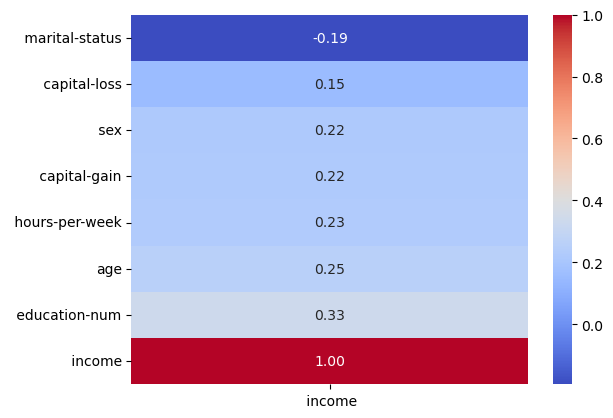

In [116]:
features_with_targert = income

#we used corr() method because all features are numeric
correlation_matrix = features_with_targert.corr()
correlation_matrix = correlation_matrix.sort_values(by = ' income' , ascending = True )

#heat map
sns.heatmap(correlation_matrix[[' income']], annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

**As we shown based on  Pearson correlation coefficient , This coefficient measures the linear correlation between features & target**

**Education number has the highest correlation with target = 0.33**

#### Information Gain  Between Features & Target

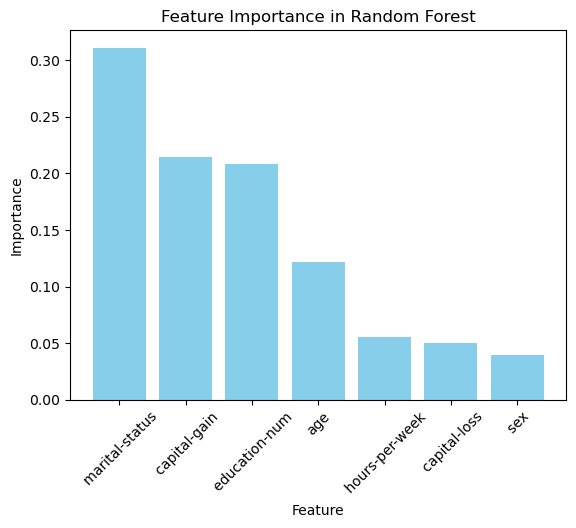

In [117]:
# Get feature importances
feature_importances = RF.feature_importances_

# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = np.array(income.columns)[sorted_indices]


# Plot feature importances
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], color='skyblue')
plt.xticks(range(X.shape[1]), sorted_features, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.show()

**As we shown based on information gain that both Decision Trees and Random Forests use Information Gain and entropy as key components in their decision-making processes**

**Marital Status  has the information gain with target = 0.33**


**So the significance of the features it always depend on the model type**


### B) Are there any unexpected biases or disparities in the data that might indicate potential discrimination issues??


**As we shown in our data there is no feature has a very high correlation or information gain with target**

**There are some features have higher effect than another .. yes , but there is no one feature can lead our models, or give by itself higher accuracy , I think we can find another features have a higher effect with our target , like experience years**

**But in the target we can show that the data is unbalanced**

In [118]:
income[' income'].value_counts()

0    22904
1     7618
Name:  income, dtype: int64

**As we have shown the precision of minor class is lower than major in all models because the 2 classes are unbalanced
so there is biasing for the major class 0 (income <= 50k) than minor one (income > 50k)** 

In [119]:
from sklearn.metrics import precision_score

data = {
    'Model': ['Random_Forest', 'Decision_Tree', 'SVM', 'KNN'],

    'Precision class 0': [
        round(precision_score(y_test, y_pred_test_RF, pos_label=0), 2),
        round(precision_score(y_test, y_pred_test_DT, pos_label=0), 2),
        round(precision_score(y_test, y_pred_test_svm, pos_label=0), 2),
        round(precision_score(y_test, y_pred_test_knn, pos_label=0), 2)
    ],

    'Precision class 1': [
        round(precision_score(y_test, y_pred_test_RF, pos_label=1), 2),
        round(precision_score(y_test, y_pred_test_DT, pos_label=1), 2),
        round(precision_score(y_test, y_pred_test_svm, pos_label=1), 2),
        round(precision_score(y_test, y_pred_test_knn, pos_label=1), 2)
    ]
}



Precision = pd.DataFrame(data)
Precision

,Model,Precision class 0,Precision class 1
0,Random_Forest,0.85,0.81
1,Decision_Tree,0.85,0.79
2,SVM,0.86,0.77
3,KNN,0.86,0.71


### C) Were there any notable challenges or advantages with any specific model during the building and evaluation process??


**yes , of course .. beacause we are working with 4 types of models & each of them has its own strengths , weaknesses , and underlying assumptions**

**Decision trees & Random forests can handle non-linear relationships , handle outliers well & can handle categorical data , easy to understand and interpret visuallynaturally , not sensitive to the scale of features but it doesn't perform well on imbalanced datasets**

**in the other hand KNNs was very sensitive to outliers & irrelevant features , It's sensitive to the scale of features & it was Computationally & time expensive because our data set is large & not Robust to Overfitting**

**SVMs perform well in high-dimensional spaces , Robust to Overfitting , but it was computationally expensive**

### D) How robust are the models to changes in the dataset or additional features? Do they generalize well to new, unseen data??

**Based on our results & evaluation metrics the highest robust models are decision trees & random forests**

**They are generally less sensitive to outliers compared to another models like KNNs & SVMs**

**They can naturally handle missing values , while KNNs or Support Vector Machines may require imputation strategies for missing**

**Thay can can handle categorical data naturally & less affected by multicollinearity**

## Great Job.